In [1]:
import scipy.io
from nibabel import Nifti1Image
import numpy as np

# Charger les données à partir du fichier .mat
mat_data = scipy.io.loadmat('data/PAT001.mat')

# Obtenir les données à partir de la clé 'data'
data = mat_data['Mask']

# Créer un nouvel objet Nifti1Image à partir des données
nii_img = Nifti1Image(data, affine=None)


# Enregistrer l'image Nifti1Image au format .nii.gz
nii_img.to_filename('data/PAT001_pe_mask.nii.gz')

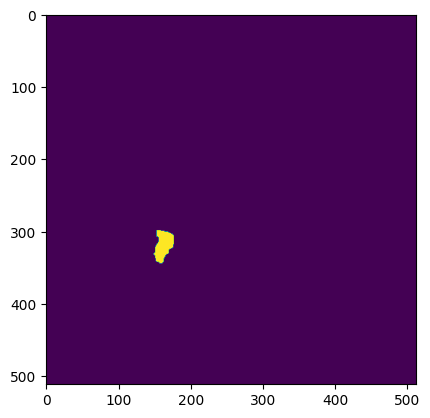

In [3]:
import matplotlib.pyplot as plt

plt.imshow(data[:,:,102]);

In [5]:
import SimpleITK as sitk

mask = sitk.ReadImage('data/PAT001_pe_mask.nii.gz')

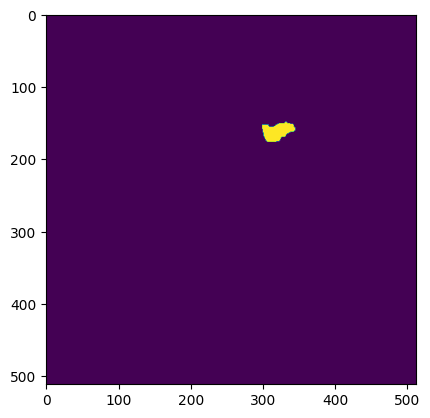

In [8]:
mask_array = sitk.GetArrayFromImage(mask)
plt.imshow(mask_array[102,:,:]);

In [10]:
# One slice 
test = np.transpose(mask_array[102,:,:])

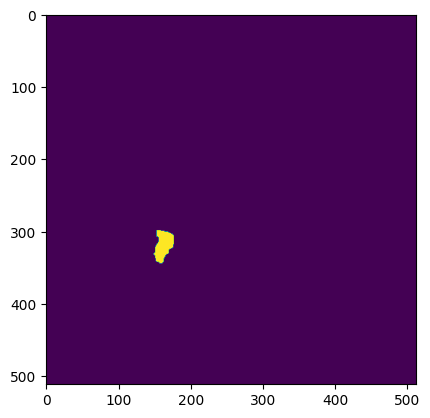

In [11]:
plt.imshow(test);

In [12]:
mask_array.shape

(201, 512, 512)

In [20]:
# All slice
test3 = np.transpose(mask_array, (0, 2, 1))

In [21]:
test3.shape

(201, 512, 512)

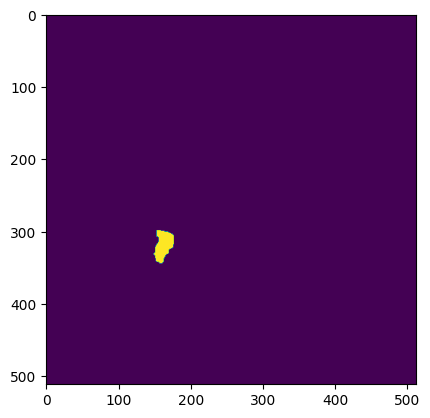

In [23]:
plt.imshow(test3[102,:,:])

In [26]:
test3_img = sitk.GetImageFromArray(test3)
sitk.WriteImage(test3_img, 'data/P001_pe_mask.nii.gz')

In [29]:
import os
import SimpleITK as sitk

from tqdm import tqdm
from termcolor import colored

In [31]:
# Code from @lminvielle
for path in ['data/PAT002/']:
    # Check if already there
    fileout = os.path.join(path, "PAT002.nii.gz")
    if os.path.exists(fileout):
        print(colored("Nifti file already there. Passing...", 'yellow'))
        continue
    
    else:
        print(colored("Create Nifti...", 'cyan'))
    
    # Open DICOM series
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(os.path.join(path))

    if len(dicom_names) == 0:
        print(colored("No DICOM in dir. Passing", 'magenta'))
        continue
    
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    
    # Write Nifti
    print(colored("Write to Nifti: {}".format('./' + fileout), 'green'))
    sitk.WriteImage(image, fileout)

Create Nifti...
Write to Nifti: data/PAT002/PAT002.nii.gz


In [33]:
import scipy.io
from nibabel import Nifti1Image
import numpy as np

# Charger les données à partir du fichier .mat
mat_data = scipy.io.loadmat('data/PAT002.mat')

# Obtenir les données à partir de la clé 'data'
data = mat_data['Mask']

# Créer un nouvel objet Nifti1Image à partir des données
nii_img = Nifti1Image(data, affine=None)

# Enregistrer l'image Nifti1Image au format .nii.gz
nii_img.to_filename('data/PAT002_pe_mask.nii.gz')

In [34]:
import SimpleITK as sitk

test2 = sitk.ReadImage('data/PAT002_pe_mask.nii.gz')

In [35]:
test2_array = sitk.GetArrayFromImage(test2)

In [36]:
test3 = np.transpose(test2_array, (0, 2, 1))

In [37]:
test3_img = sitk.GetImageFromArray(test3)
sitk.WriteImage(test3_img, 'data/PAT002_pe_mask.nii.gz')